In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 100

df = pd.read_csv('CR_COST_FCFP1.csv', converters={'PARTY_ID': str, 'COM_ID': str, 'CNTR_SIZE': str})
df['POD'] = pd.to_datetime(df['POD'])
df['ENCODED_TYPE'] = df['ENCODED_TYPE'].fillna(-1).astype(int)
df = df.dropna(subset=['ENCODED_TYPE'])
df['RATE'] = df['RATE'].fillna(-1).astype(int)
df = df.dropna(subset=['RATE'])
df['ENCODED_TYPE'] = df['ENCODED_TYPE'].astype(int)


df.head()
df.info()
print(f'Dataset size: {df.shape}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102496 entries, 0 to 102495
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   COM_ID        102496 non-null  object        
 1   PARTY_ID      102496 non-null  object        
 2   PARTY_NAME    102496 non-null  object        
 3   CSL_ID        102496 non-null  object        
 4   ETA_ETD_NO    102496 non-null  int64         
 5   ETD_POL_D     102496 non-null  object        
 6   POD_ID        102382 non-null  object        
 7   POD           102496 non-null  datetime64[ns]
 8   CNTR_ID       102496 non-null  object        
 9   CNTR_SIZE     102496 non-null  object        
 10  CNTR_TYPE     102493 non-null  object        
 11  COST_TERM     102496 non-null  object        
 12  RATE          102496 non-null  int32         
 13  ENCODED_TYPE  102496 non-null  int32         
 14  ENCODED_TERM  102496 non-null  int64         
 15  PARTY_ID_EN   102

In [2]:
print(str(len(df['POD_ID'].unique())) + " unique ports.")

241 unique ports.


<h3>Label Encoding to make all into int</h3>


In [3]:
from sklearn.preprocessing import LabelEncoder

# Instantiate a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the column of unique values
le.fit(df['POD_ID'].unique())

# Apply the label encoder to the original column
df['POD_ID_EN'] = le.transform(df['POD_ID'])

print(str(len(df['POD_ID'].unique())) + " unique ports after encoding.")
df.head()
df.info()

LabelEncoder()

241 unique ports after encoding.


,COM_ID,PARTY_ID,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,COST_TERM,RATE,ENCODED_TYPE,ENCODED_TERM,PARTY_ID_EN,POD_ID_EN
0,010,010003678,OY TAVATUR SHIPPING LTD,ECS010060100191,20060228,FIHEL,HELSINKI,2006-02-28,CTNR010060201232,20,GP,FC,675,2,1,10003678,79
1,010,010004286,"GLOBELINK KOREA CO., LTD",ECS010060100465,20060303,KRPUS,BUSAN,2006-03-03,CTNR010060300014,40,HC,FC,390,1,1,10004286,34
2,010,01005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS010060100321,20060227,NZAKL,AUCKLAND,2006-02-27,CTNR010060201198,40,HC NOR,FC,1615,4,1,1005136,18
3,010,01004906,MEDITERRANEAN SHIPPING COMPANY S.E.A (SINGAPOR...,ECS010060200592,20060303,LKCMB,COLOMBO,2006-03-03,CTNR010060300015,40,HC,FP,650,1,2,1004906,49
4,010,01008573,WAN HAI INTERNATIONAL PTE LTD,ECS010060200181,20060305,JPOSA,OSAKA,2006-03-05,CTNR010060300111,20,GP,FP,370,2,2,1008573,165


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102496 entries, 0 to 102495
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   COM_ID        102496 non-null  object        
 1   PARTY_ID      102496 non-null  object        
 2   PARTY_NAME    102496 non-null  object        
 3   CSL_ID        102496 non-null  object        
 4   ETA_ETD_NO    102496 non-null  int64         
 5   ETD_POL_D     102496 non-null  object        
 6   POD_ID        102382 non-null  object        
 7   POD           102496 non-null  datetime64[ns]
 8   CNTR_ID       102496 non-null  object        
 9   CNTR_SIZE     102496 non-null  object        
 10  CNTR_TYPE     102493 non-null  object        
 11  COST_TERM     102496 non-null  object        
 12  RATE          102496 non-null  int32         
 13  ENCODED_TYPE  102496 non-null  int32         
 14  ENCODED_TERM  102496 non-null  int64         
 15  PARTY_ID_EN   102

In [4]:
from sklearn.preprocessing import LabelEncoder

# Instantiate a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the column of unique values
le.fit(df['CNTR_SIZE'].unique())

# Apply the label encoder to the original column
df['CNTR_SIZE_EN'] = le.transform(df['CNTR_SIZE'])

print(str(len(df['CNTR_SIZE_EN'].unique())) + " unique container size after encoding.")
df.head()
df.info()

LabelEncoder()

4 unique container size after encoding.


,COM_ID,PARTY_ID,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,COST_TERM,RATE,ENCODED_TYPE,ENCODED_TERM,PARTY_ID_EN,POD_ID_EN,CNTR_SIZE_EN
0,010,010003678,OY TAVATUR SHIPPING LTD,ECS010060100191,20060228,FIHEL,HELSINKI,2006-02-28,CTNR010060201232,20,GP,FC,675,2,1,10003678,79,1
1,010,010004286,"GLOBELINK KOREA CO., LTD",ECS010060100465,20060303,KRPUS,BUSAN,2006-03-03,CTNR010060300014,40,HC,FC,390,1,1,10004286,34,2
2,010,01005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS010060100321,20060227,NZAKL,AUCKLAND,2006-02-27,CTNR010060201198,40,HC NOR,FC,1615,4,1,1005136,18,2
3,010,01004906,MEDITERRANEAN SHIPPING COMPANY S.E.A (SINGAPOR...,ECS010060200592,20060303,LKCMB,COLOMBO,2006-03-03,CTNR010060300015,40,HC,FP,650,1,2,1004906,49,2
4,010,01008573,WAN HAI INTERNATIONAL PTE LTD,ECS010060200181,20060305,JPOSA,OSAKA,2006-03-05,CTNR010060300111,20,GP,FP,370,2,2,1008573,165,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102496 entries, 0 to 102495
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   COM_ID        102496 non-null  object        
 1   PARTY_ID      102496 non-null  object        
 2   PARTY_NAME    102496 non-null  object        
 3   CSL_ID        102496 non-null  object        
 4   ETA_ETD_NO    102496 non-null  int64         
 5   ETD_POL_D     102496 non-null  object        
 6   POD_ID        102382 non-null  object        
 7   POD           102496 non-null  datetime64[ns]
 8   CNTR_ID       102496 non-null  object        
 9   CNTR_SIZE     102496 non-null  object        
 10  CNTR_TYPE     102493 non-null  object        
 11  COST_TERM     102496 non-null  object        
 12  RATE          102496 non-null  int32         
 13  ENCODED_TYPE  102496 non-null  int32         
 14  ENCODED_TERM  102496 non-null  int64         
 15  PARTY_ID_EN   102

In [5]:
df_fc = df[df["COST_TERM"] == "FC"].reset_index(drop=True)
df_fc.head()
df_fc.info()

,COM_ID,PARTY_ID,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,COST_TERM,RATE,ENCODED_TYPE,ENCODED_TERM,PARTY_ID_EN,POD_ID_EN,CNTR_SIZE_EN
0,010,010003678,OY TAVATUR SHIPPING LTD,ECS010060100191,20060228,FIHEL,HELSINKI,2006-02-28,CTNR010060201232,20,GP,FC,675,2,1,10003678,79,1
1,010,010004286,"GLOBELINK KOREA CO., LTD",ECS010060100465,20060303,KRPUS,BUSAN,2006-03-03,CTNR010060300014,40,HC,FC,390,1,1,10004286,34,2
2,010,01005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS010060100321,20060227,NZAKL,AUCKLAND,2006-02-27,CTNR010060201198,40,HC NOR,FC,1615,4,1,1005136,18,2
3,010,01002775,GLOBELINK INTERNATIONAL PTY LTD-ADELAIDE,ECS010060200201,20060306,AUADL,ADELAIDE,2006-03-06,CTNR010060300119,40,HC,FC,700,1,1,1002775,5,2
4,010,01001088,CARGO LINES S.A.-LE HAVRE,ECS010060200146,20060307,FRMRS,MARSEILLE,2006-03-07,CTNR010060300185,20,GP,FC,675,2,1,1001088,143,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54089 entries, 0 to 54088
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        54089 non-null  object        
 1   PARTY_ID      54089 non-null  object        
 2   PARTY_NAME    54089 non-null  object        
 3   CSL_ID        54089 non-null  object        
 4   ETA_ETD_NO    54089 non-null  int64         
 5   ETD_POL_D     54089 non-null  object        
 6   POD_ID        54083 non-null  object        
 7   POD           54089 non-null  datetime64[ns]
 8   CNTR_ID       54089 non-null  object        
 9   CNTR_SIZE     54089 non-null  object        
 10  CNTR_TYPE     54089 non-null  object        
 11  COST_TERM     54089 non-null  object        
 12  RATE          54089 non-null  int32         
 13  ENCODED_TYPE  54089 non-null  int32         
 14  ENCODED_TERM  54089 non-null  int64         
 15  PARTY_ID_EN   54089 non-null  int64 

In [6]:
df_fp = df[df["COST_TERM"] == "FP"].reset_index(drop=True)
df_fp.head()
df_fp.info()

,COM_ID,PARTY_ID,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,COST_TERM,RATE,ENCODED_TYPE,ENCODED_TERM,PARTY_ID_EN,POD_ID_EN,CNTR_SIZE_EN
0,010,01004906,MEDITERRANEAN SHIPPING COMPANY S.E.A (SINGAPOR...,ECS010060200592,20060303,LKCMB,COLOMBO,2006-03-03,CTNR010060300015,40,HC,FP,650,1,2,1004906,49,2
1,010,01008573,WAN HAI INTERNATIONAL PTE LTD,ECS010060200181,20060305,JPOSA,OSAKA,2006-03-05,CTNR010060300111,20,GP,FP,370,2,2,1008573,165,1
2,010,01005114,KMTC (SINGAPORE) PTE LTD,ECS010060200248,20060305,IDSUB,SURABAYA,2006-03-05,CTNR010060300075,20,GP,FP,120,2,2,1005114,207,1
3,010,01005114,KMTC (SINGAPORE) PTE LTD,ECS010060200262,20060306,INNSA,NHAVA SHEVA ( JNPT ),2006-03-06,CTNR010060300081,40,HC,FP,1100,1,2,1005114,160,2
4,010,01004690,MAERSK SINGAPORE PTE LTD,ECS010060100367,20060221,MXZLO,"MANZANILLO , MEXICO",2006-02-21,CTNR010060200515,40,HC NOR,FP,3500,4,2,1004690,139,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48407 entries, 0 to 48406
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        48407 non-null  object        
 1   PARTY_ID      48407 non-null  object        
 2   PARTY_NAME    48407 non-null  object        
 3   CSL_ID        48407 non-null  object        
 4   ETA_ETD_NO    48407 non-null  int64         
 5   ETD_POL_D     48407 non-null  object        
 6   POD_ID        48299 non-null  object        
 7   POD           48407 non-null  datetime64[ns]
 8   CNTR_ID       48407 non-null  object        
 9   CNTR_SIZE     48407 non-null  object        
 10  CNTR_TYPE     48404 non-null  object        
 11  COST_TERM     48407 non-null  object        
 12  RATE          48407 non-null  int32         
 13  ENCODED_TYPE  48407 non-null  int32         
 14  ENCODED_TERM  48407 non-null  int64         
 15  PARTY_ID_EN   48407 non-null  int64 

<h2>PCA</h2>

In [11]:
# Step 1: Standardize the data
cols_to_standardize = ['ETA_ETD_NO','RATE','ENCODED_TYPE', 'CNTR_SIZE_EN','PARTY_ID_EN','POD_ID_EN'] # list the columns to standardize


In [12]:
# FC Dataframe
df_fc_en = df_fc[cols_to_standardize]
df_fc_en.head()
df_fc_en.info()

# FP Dataframe
df_fp_en = df_fp[cols_to_standardize]
df_fp_en.head()
df_fp_en.info()

,ETA_ETD_NO,RATE,ENCODED_TYPE,CNTR_SIZE_EN,PARTY_ID_EN,POD_ID_EN
0,20060228,675,2,1,10003678,79
1,20060303,390,1,2,10004286,34
2,20060227,1615,4,2,1005136,18
3,20060306,700,1,2,1002775,5
4,20060307,675,2,1,1001088,143


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54089 entries, 0 to 54088
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ETA_ETD_NO    54089 non-null  int64
 1   RATE          54089 non-null  int32
 2   ENCODED_TYPE  54089 non-null  int32
 3   CNTR_SIZE_EN  54089 non-null  int32
 4   PARTY_ID_EN   54089 non-null  int64
 5   POD_ID_EN     54089 non-null  int32
dtypes: int32(4), int64(2)
memory usage: 1.7 MB


,ETA_ETD_NO,RATE,ENCODED_TYPE,CNTR_SIZE_EN,PARTY_ID_EN,POD_ID_EN
0,20060303,650,1,2,1004906,49
1,20060305,370,2,1,1008573,165
2,20060305,120,2,1,1005114,207
3,20060306,1100,1,2,1005114,160
4,20060221,3500,4,2,1004690,139


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48407 entries, 0 to 48406
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ETA_ETD_NO    48407 non-null  int64
 1   RATE          48407 non-null  int32
 2   ENCODED_TYPE  48407 non-null  int32
 3   CNTR_SIZE_EN  48407 non-null  int32
 4   PARTY_ID_EN   48407 non-null  int64
 5   POD_ID_EN     48407 non-null  int32
dtypes: int32(4), int64(2)
memory usage: 1.5 MB


In [13]:
#plots eigen vector
#eigen vector chosen should have cummulative > 0.65
def pcaPlotEigenVec(pca_all, numOfFeatures):
    eigen_energy=pca_all.explained_variance_ratio_
    print(eigen_energy)

    cum_var_exp = np.cumsum(eigen_energy)

    plt.step(range(1,numOfFeatures), cum_var_exp, where='mid',
         label='cumulative explained variance')

    plt.bar(range(1,numOfFeatures), eigen_energy, alpha=0.5, align='center', label='individual explained variance')
    plt.xlabel('PC')
    plt.ylabel('eigen_variance_energy_ratio')
    plt.title("Plot of eigen variance energy captured by Principle component")

<h3>FP PCA</h3>

       ETA_ETD_NO      RATE  ENCODED_TYPE  CNTR_SIZE_EN  PARTY_ID_EN  \
0       -1.282300 -0.379750     -0.705588      0.475931    -0.492728   
1       -1.282258 -0.553434      0.173437     -1.974440    -0.491701   
2       -1.282258 -0.708508      0.173437     -1.974440    -0.492670   
3       -1.282237 -0.100616     -0.705588      0.475931    -0.492670   
4       -1.284038  1.388099      1.931486      0.475931    -0.492788   
...           ...       ...           ...           ...          ...   
48402    0.855501 -0.658884      0.173437     -1.974440    -0.492243   
48403    0.855523  0.519682      1.931486      0.475931    -0.492295   
48404    0.855523  0.023444      0.173437     -1.974440    -0.493657   
48405    0.855523 -0.472795      0.173437     -1.974440    -0.492738   
48406    0.855544 -0.088210      0.173437     -1.974440     2.028499   

       POD_ID_EN  
0      -1.042563  
1       0.613972  
2       1.213752  
3       0.542569  
4       0.242680  
...          ...  
48

PCA()

Explained variance ratio: [0.24979207 0.20366811 0.16495662 0.15128842 0.13202834 0.09826645]
[0.24979207 0.20366811 0.16495662 0.15128842 0.13202834 0.09826645]


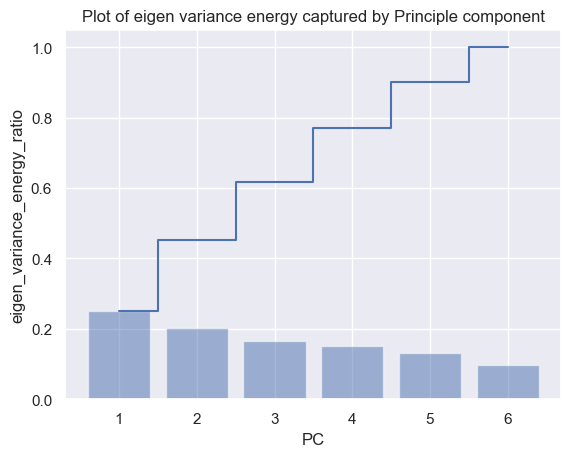

In [15]:
from sklearn.decomposition import PCA

# For FP Z-score normaliszation
df_fp_en = (df_fp_en - df_fp_en.mean()) / df_fp_en.std()
print(df_fp_en)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(df_fp_en.T)

# Step 3: Compute the principal components
pcaFP = PCA()
pcaFP.fit(df_fp_en)

# Step 4: Interpret the principal components
explained_variance_ratio = pcaFP.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# Step 5: Transform the data to the new feature space
transformed_data = pcaFP.transform(df_fp_en)

totalComponents = df_fp_en.shape[1]
pcaPlotEigenVec(pcaFP, totalComponents+1)



<h3>FC PCA</h3>

       ETA_ETD_NO      RATE  ENCODED_TYPE  CNTR_SIZE_EN  PARTY_ID_EN  \
0       -1.882816 -0.372739      0.478318     -1.965618     0.653255   
1       -1.881221 -0.511386     -0.579572      0.504947     0.653348   
2       -1.882837  0.084552      2.594098      0.504947    -0.722127   
3       -1.881157 -0.360577     -0.579572      0.504947    -0.722488   
4       -1.881136 -0.372739      0.478318     -1.965618    -0.722746   
...           ...       ...           ...           ...          ...   
54084    0.263748 -0.530845      0.478318     -1.965618     0.656015   
54085    0.263770 -0.482197     -0.579572      0.504947    -0.722487   
54086    0.263833 -0.214633      0.478318     -1.965618     0.653685   
54087    0.263855  0.101579     -0.579572      0.504947     0.653882   
54088    0.263855 -0.445711     -0.579572      0.504947    -0.722486   

       POD_ID_EN  
0      -0.397832  
1      -1.071679  
2      -1.311269  
3      -1.505936  
4       0.560527  
...          ...  
54

PCA()

Explained variance ratio: [0.25203393 0.20179637 0.16260874 0.15517409 0.12572633 0.10266054]
[0.25203393 0.20179637 0.16260874 0.15517409 0.12572633 0.10266054]


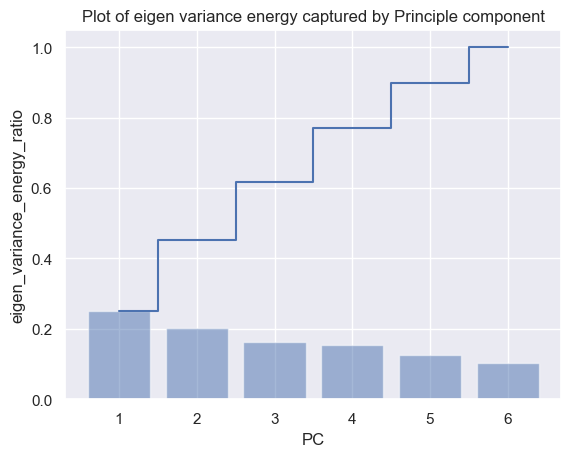

In [16]:
# For FC Z-score normaliszation
df_fc_en = (df_fc_en - df_fc_en.mean()) / df_fc_en.std()
print(df_fc_en)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(df_fc_en.T)

# Step 3: Compute the principal components
pcaFC = PCA()
pcaFC.fit(df_fc_en)

# Step 4: Interpret the principal components
explained_variance_ratio = pcaFC.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# Step 5: Transform the data to the new feature space
transformed_data = pcaFC.transform(df_fc_en)

totalComponents = df_fc_en.shape[1]
pcaPlotEigenVec(pcaFC, totalComponents+1)

<p>With each subsequent component capturing almost as much variation as the previous one, it could be an indication that the original data is not well-suited for PCA. This could happen if the data does not have any clear patterns or if there is no linear relationship between the variables. Pehaps better to explore other dimensionality reduction techniques, such as clustering or classification.</p>